In [1]:
import tensorflow as tf
import numpy as np

### Gradient Vector - Vector

$\textbf{y} = \textbf{x} \bigodot \textbf{x}$

### x: (1, 2)

### y: (1, 2)

### gradient: (1, 2)

### jacobian: (1, 2, 1, 2)

In [2]:

x = tf.constant([[1.0, 2.0]], dtype=tf.float32)
y = tf.constant([[1.0, 2.0]], dtype=tf.float32)


In [3]:
x = tf.constant([[1.0, 2.0]], dtype=tf.float32)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  z = x * x
gradient_x = g.gradient(z, x)
jacobian_x = g.jacobian(z, x)
# batch_jacobian_x = g.batch_jacobian(z, x)

In [4]:
gradient_x

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 4.]], dtype=float32)>

In [5]:
jacobian_x

<tf.Tensor: shape=(1, 2, 1, 2), dtype=float32, numpy=
array([[[[2., 0.]],

        [[0., 4.]]]], dtype=float32)>

In [6]:
gradient_x

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2., 4.]], dtype=float32)>

In [7]:
jacobian_x

<tf.Tensor: shape=(1, 2, 1, 2), dtype=float32, numpy=
array([[[[2., 0.]],

        [[0., 4.]]]], dtype=float32)>

In [8]:
# batch_jacobian_x

NameError: ignored

In [9]:
gradient_x[0][0] # x1 ảnh hưởng thế nào đến y

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [10]:
gradient_x[0][1] # x2 ảnh hưởng thế nào đến y

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

$\textbf{y} = \alpha \textbf{x}$

In [11]:
x = tf.constant([[1.0, 3.0]], dtype=np.float32)
alpha = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = alpha * x
jacobian = g.jacobian(y, x)


In [12]:
part_dev_x

NameError: ignored

### Gradient matrix - matrix


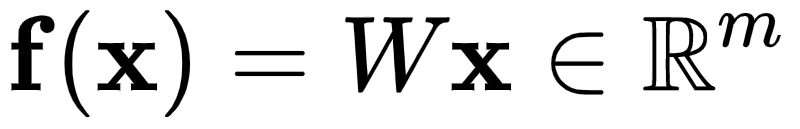

In [ ]:
W = tf.constant([[1.0, 2.0, 3.0], [-1.0, 3.0, 2.0], [2.0, 3.0, 1.0]], dtype=np.float32)
x = tf.constant([[4.0], [5.0], [6.0]], dtype=np.float32)
with tf.GradientTape(persistent=True) as g:
  g.watch(W)
  g.watch(x)
  y = tf.matmul(W, x)
part_dev_x = g.gradient(y, x)
part_dev_W = g.gradient(y, W)
jc_x = g.jacobian(y, x)
jc_W = g.jacobian(y, W)

In [ ]:
W.shape, x.shape, y.shape

In [ ]:
y.shape

In [ ]:
part_dev_x

In [ ]:
part_dev_W

In [ ]:
jc_x

In [ ]:
jc_W

In [ ]:
g.jacobian(y, x)

In [ ]:
g.jacobian(y, x).shape

$
A = \begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
$  $B = \begin{bmatrix}
5 & 6 \\
7 & 8
\end{bmatrix} $  $ C = A \cdot B $. Tính $\nabla_{A}{C}$ và Jacobian tương ứng.

In [ ]:
A = tf.constant([[1, 2], [3, 4]], dtype=np.float32)
B = tf.constant([[5, 6], [7, 8]], dtype=np.float32)
D = tf.constant([[3, 6], [8, 9]], dtype=np.float32)
with tf.GradientTape(persistent=True) as g:
  g.watch(A)
  C = tf.matmul(A, B) + A
part_dev_A = g.gradient(C, A)
j = g.jacobian(C, A)


In [ ]:
part_dev_A

Cách dùng khác của GradientTape

In [ ]:
@tf.function
def example():
  x = tf.constant([[1, 2], [3, 4]], dtype=np.float32)
  y = tf.constant([[5, 6], [7, 8]], dtype=np.float32)
  z = tf.matmul(x, y)
  return tf.gradients(z, [x, y])
example()

In [ ]:
@tf.function
def example():
  a = tf.constant(0.)
  b = 2 * a
  return tf.gradients(a + b, [a, b], stop_gradients=[a, b])
example()

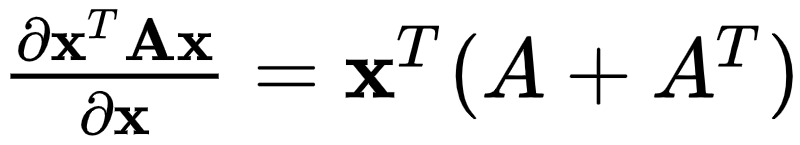

In [ ]:
A = tf.constant([[1.0, 2.0, 3.0], [-1.0, 3.0, 2.0], [2.0, 3.0, 1.0]], dtype=np.float32)
x = tf.constant([[4.0], [5.0], [6.0]], dtype=np.float32)
with tf.GradientTape(persistent=True) as g:
  g.watch(W)
  g.watch(x)
  y = tf.matmul(tf.matmul(tf.transpose(x), A), x)
part_dev_x = g.gradient(y, x)
jc_x = g.jacobian(y, x)


In [ ]:
y.shape

In [ ]:
jc_x

In [ ]:
tf.matmul(tf.transpose(x), (tf.transpose(A) + A))